In [2]:
import pandas as pd
import numpy as np

In [3]:
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('dataset_bank.csv')

In [6]:
dataset.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
dataset.shape

(10127, 21)

In [8]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# Check columns list and missing values=No missing values
dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# Get unique count for each variable
dataset.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 47
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
for col in dataset.columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (dataset[col].value_counts())


Frequency of Categories for varible CLIENTNUM
780097533    1
720049083    1
717376758    1
720598308    1
719930658    1
            ..
818987958    1
808753758    1
789347133    1
806189658    1
713594883    1
Name: CLIENTNUM, Length: 10127, dtype: int64

Frequency of Categories for varible Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Frequency of Categories for varible Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64

Frequency of Categories for varible Gender
F    5358
M    4769
Name: G

In [12]:
# Drop the column CLIENTNUM                   
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

In [13]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------
Category columns
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [14]:
categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print (categorical_columns)
print(numeric_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Text(0, 0.5, 'Frequency')

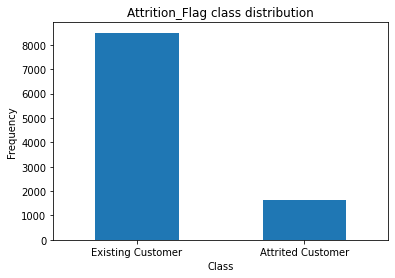

In [15]:
# class  Frequency

labels = ['Existing Customer','Attrited Customer']
classes = pd.value_counts(dataset['Attrition_Flag'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Attrition_Flag class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
#SMOTE-Unbalanced dataset

<AxesSubplot:>

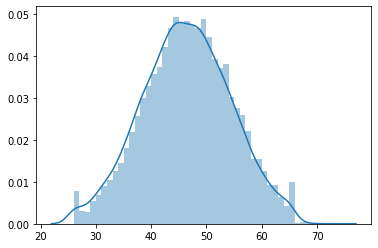

In [16]:
# distribution of Customer_Age
age = [dataset['Customer_Age'].values]
sns.distplot(age)

<AxesSubplot:>

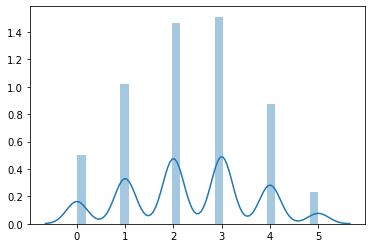

In [17]:
# distribution of Dependent_count
Dependent_count = [dataset['Dependent_count'].values]
sns.distplot(Dependent_count)

In [18]:
print(numeric_columns)

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [100]:
#for n_f in numeric_columns: 
   # plt.figure()
    #plt.title(n_f)
    #ax = sns.distplot(dataset[numeric_columns])

<AxesSubplot:>

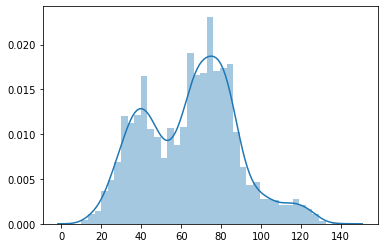

In [19]:
# distribution of Total_Trans_Ct
Total_Trans_Ct = [dataset['Total_Trans_Ct'].values]
sns.distplot(Total_Trans_Ct)

<AxesSubplot:>

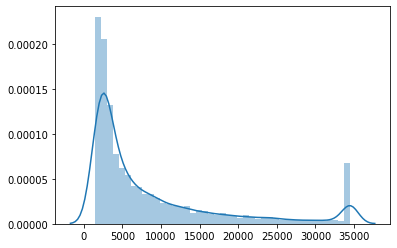

In [20]:
# distribution of Credit_Limit
Credit_Limit = [dataset['Credit_Limit'].values]
sns.distplot(Credit_Limit)

<AxesSubplot:>

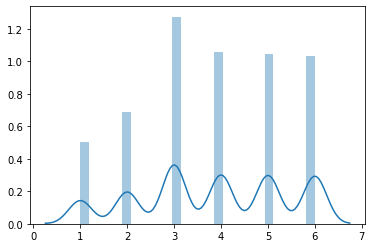

In [21]:
# distribution of Total_Relationship_Count
Total_Relationship_Count = [dataset['Total_Relationship_Count'].values]
sns.distplot(Total_Relationship_Count)

<AxesSubplot:>

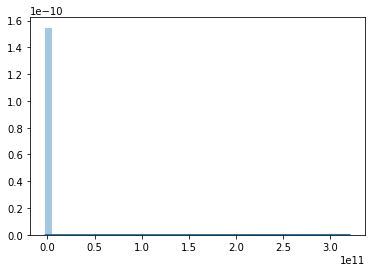

In [22]:
# distribution of Months_on_book
Months_on_book = [dataset['Months_on_book'].values]
sns.distplot(Months_on_book)
#Outliers

<AxesSubplot:>

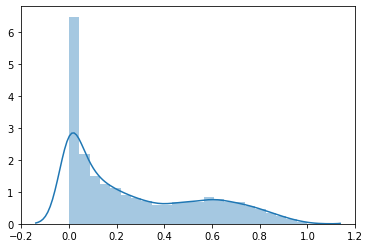

In [23]:
# distribution of Avg_Utilization_Ratio-
Avg_Utilization_Ratio = [dataset['Avg_Utilization_Ratio'].values]
sns.distplot(Avg_Utilization_Ratio)

<AxesSubplot:>

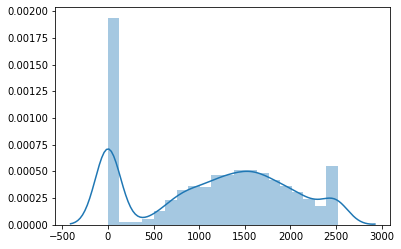

In [24]:
# distribution of Total_Revolving_Bal-
Total_Revolving_Bal = [dataset['Total_Revolving_Bal'].values]
sns.distplot(Total_Revolving_Bal)


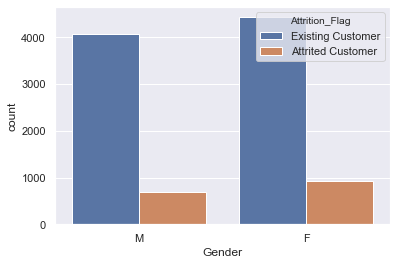

In [25]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Attrition_Flag", data=dataset)
plt.show()
#Female has a higher proportion of attrition compared to males.

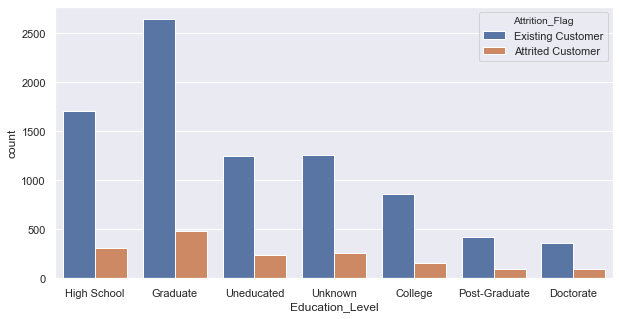

In [26]:
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Education_Level", hue="Attrition_Flag", data=dataset)
plt.show()

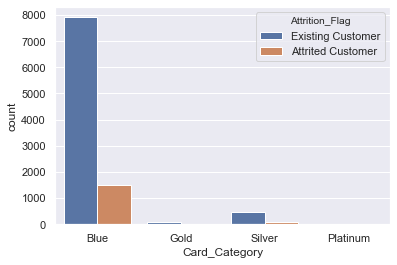

In [27]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="Card_Category", hue="Attrition_Flag", data=dataset)
plt.show()
#Majority of the data in Card_category is using Blue Card

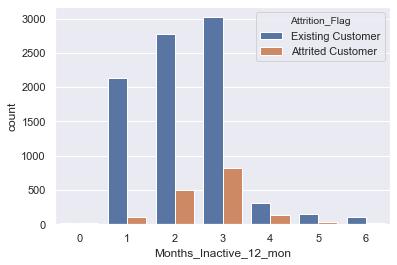

In [28]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="Months_Inactive_12_mon", hue="Attrition_Flag", data=dataset)
plt.show()
#Majority of the clients who abandoned the Bank were inactive 2-3 months

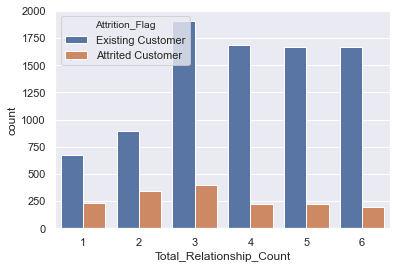

In [29]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="Total_Relationship_Count", hue="Attrition_Flag", data=dataset)
plt.show()
#Somehow the clients who held more products stayed in the Bank??

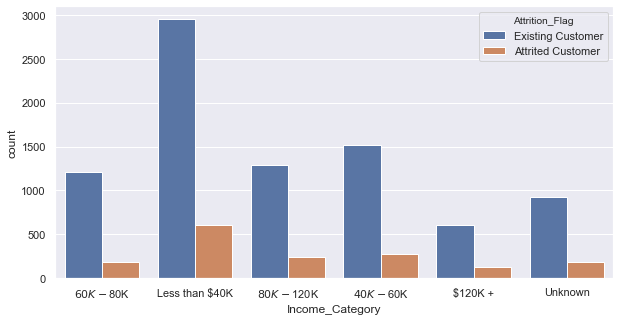

In [30]:
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Income_Category", hue="Attrition_Flag", data=dataset)
plt.show()

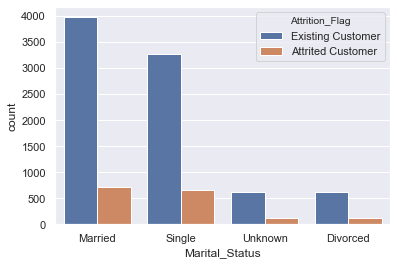

In [31]:
%matplotlib inline
sns.set(style="darkgrid")
#plt.figure(figsize=(10,5))
ax = sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=dataset)
plt.show()
#Majority of the dataset is Married or Single, so is the clients who leaved

In [32]:
#calculate skew and sort
#The coefficient of skewness is a measure of asymmetry in the distribution.
#A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
#A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats=dataset[numeric_columns].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skew_feats})
skewness

,skew
Months_on_book,100.290596
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673
Contacts_Count_12_mon,0.011006


In [ ]:
#Encoding
#Normalization

In [87]:
# heat map of correlation of features
#correlation_matrix = dataset.corr()
#fig = plt.figure(figsize=(15,10))
#sns.heatmap(correlation_matrix,vmax=0.8,square = True)
#plt.show()